In [24]:
import yfinance as yf
import pandas as pd

# Load gold futures data
gold = yf.Ticker("GC=F")
gold_data = gold.history(start="2010-01-01")

# Keep only necessary columns
gold_data = gold_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Fill missing values using forward fill
gold_data.fillna(method='ffill', inplace=True)

# Reset index to turn date index into a column
gold_data.reset_index(inplace=True)

# Convert datetime to date (remove time)
gold_data['Date'] = gold_data['Date'].dt.date

# Optional: reorder columns to have Date first
gold_data = gold_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Save to CSV
gold_data.to_csv("cleaned_gold_price_2010_to_present.csv", index=False)
print("Cleaned data with date only saved to cleaned_gold_price_2010_to_present.csv")


Cleaned data with date only saved to cleaned_gold_price_2010_to_present.csv


/var/folders/j0/w_nkzt051mn4tt9zkz40drc80000gp/T/ipykernel_66387/584990118.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_data.fillna(method='ffill', inplace=True)


In [25]:
gold_data.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,184
1,2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,53
2,2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,363
3,2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,56
4,2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,54


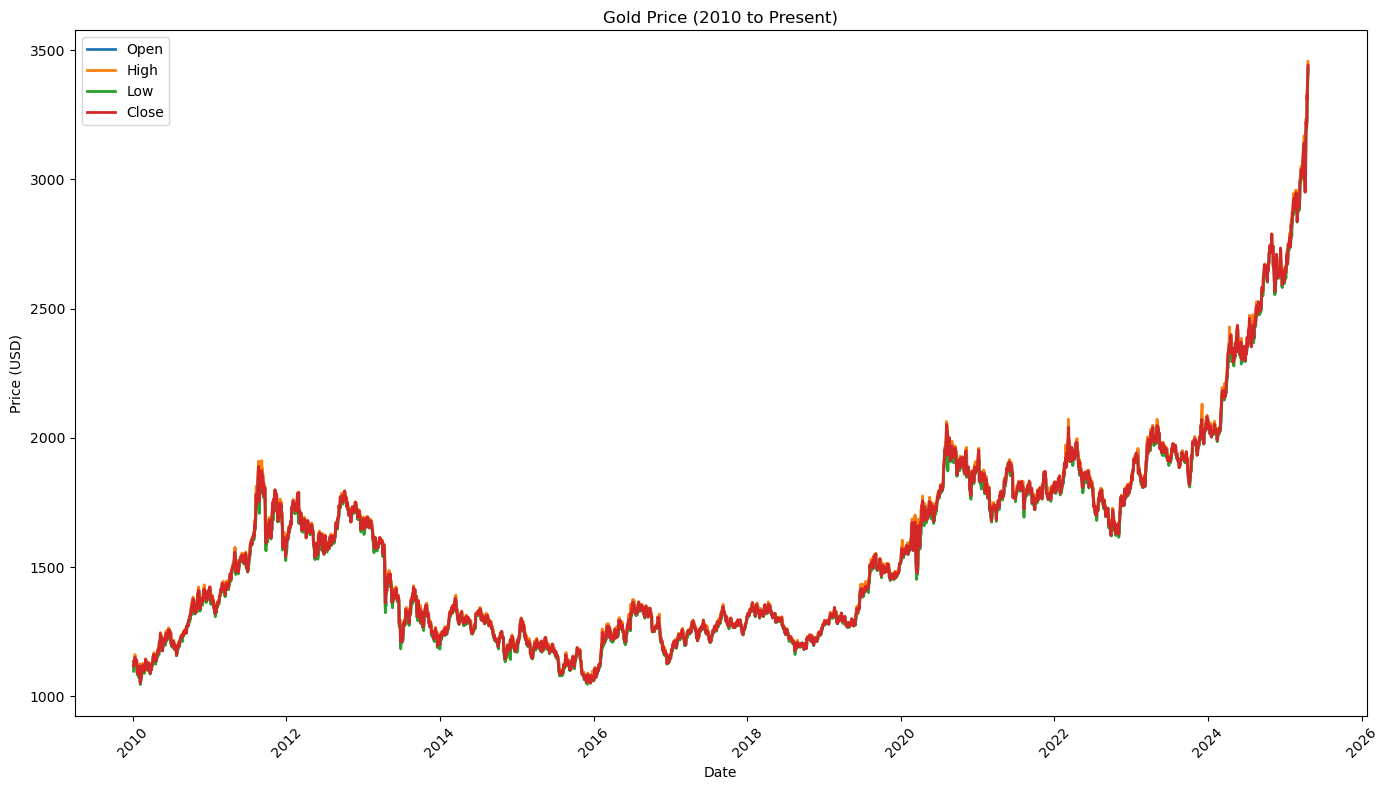

In [26]:
import matplotlib.pyplot as plt
#Convert the 'Date' column back to datetime format (since it's now just a date)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

plt.figure(figsize=(14, 8))
# Plot each of the columns (Open, High, Low, Close) over time
plt.plot(gold_data['Date'], gold_data['Open'], label='Open', linewidth=2)
plt.plot(gold_data['Date'], gold_data['High'], label='High', linewidth=2)
plt.plot(gold_data['Date'], gold_data['Low'], label='Low', linewidth=2)
plt.plot(gold_data['Date'], gold_data['Close'], label='Close', linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Gold Price (2010 to Present)')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
